In [1]:
from datetime import *
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
df_cars = pd.read_csv('cars.csv')
df_services = pd.read_csv('services.csv')
df_receipt1 = pd.read_csv('receipt_1.csv')
df_receipt2 = pd.read_csv('receipt_2.csv')

In [3]:
df_conc_receipts = pd.concat([df_receipt1, df_receipt2], ignore_index=True)

In [4]:
df_merged = df_conc_receipts.merge(df_cars, how='right')
df_merged = df_merged.merge(df_services, how='right', left_on='op_num', right_on='op_num')

In [5]:
df_merged

,car_num,op_num,detail_amount,brand,year,op_name,op_price,detail_price
0,2,1,NaN,honda,2007,repairing,299.0,0.00
1,3,1,NaN,tesla,2016,repairing,299.0,0.00
2,4,1,NaN,hundai,2012,repairing,299.0,0.00
3,1,2,NaN,mercedes,2004,clean,100.0,0.00
4,1,2,NaN,mercedes,2004,clean,100.0,0.00
5,1,2,NaN,mercedes,2004,clean,100.0,0.00
6,4,2,NaN,hundai,2012,clean,100.0,0.00
7,1,3,NaN,mercedes,2004,inspection,56.9,0.00
8,3,3,NaN,tesla,2016,inspection,56.9,0.00
9,1,4,3.0,mercedes,2004,change,99.0,149.99


In [6]:
# де невідома кількість деталей рахується вартість без них
df_merged['general_price'] = df_merged.apply(lambda row: 
                                             row['op_price'] if (row['detail_amount'] != row['detail_amount'])
                                             else row['detail_amount']*row['detail_price'] + row['op_price'], axis=1)
df_merged

,car_num,op_num,detail_amount,brand,year,op_name,op_price,detail_price,general_price
0,2,1,NaN,honda,2007,repairing,299.0,0.00,299.00
1,3,1,NaN,tesla,2016,repairing,299.0,0.00,299.00
2,4,1,NaN,hundai,2012,repairing,299.0,0.00,299.00
3,1,2,NaN,mercedes,2004,clean,100.0,0.00,100.00
4,1,2,NaN,mercedes,2004,clean,100.0,0.00,100.00
5,1,2,NaN,mercedes,2004,clean,100.0,0.00,100.00
6,4,2,NaN,hundai,2012,clean,100.0,0.00,100.00
7,1,3,NaN,mercedes,2004,inspection,56.9,0.00,56.90
8,3,3,NaN,tesla,2016,inspection,56.9,0.00,56.90
9,1,4,3.0,mercedes,2004,change,99.0,149.99,548.97


In [7]:
df_merged.fillna(0,inplace=True)
filt1 = df_merged['detail_amount'] == 0
filt2 = df_merged['detail_amount'] != 0

In [8]:
print("Summary peyment for oerations without deatil changing: ", df_merged.loc[filt1, 'general_price'].sum())
print("Summary peyment for oerations with deatil changing: ", df_merged.loc[filt2, 'general_price'].sum())

Summary peyment for oerations without deatil changing:  1410.8000000000002
Summary peyment for oerations with deatil changing:  2345.87


In [9]:
df_grouped_by_brand = df_merged.groupby('brand').sum()

<AxesSubplot:xlabel='brand'>

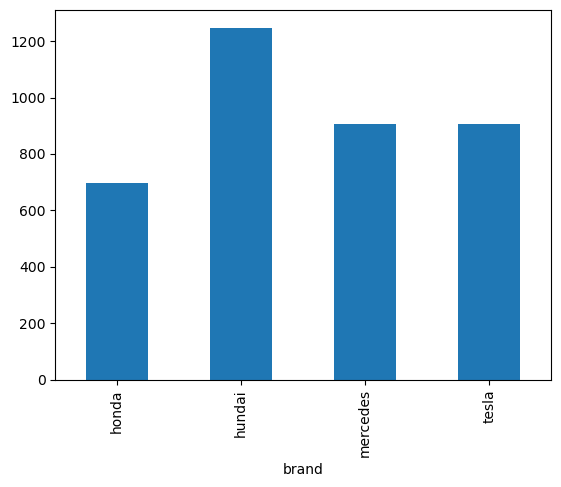

In [10]:
df_grouped_by_brand['general_price'].plot(kind='bar')

In [11]:
df_merged

,car_num,op_num,detail_amount,brand,year,op_name,op_price,detail_price,general_price
0,2,1,0.0,honda,2007,repairing,299.0,0.00,299.00
1,3,1,0.0,tesla,2016,repairing,299.0,0.00,299.00
2,4,1,0.0,hundai,2012,repairing,299.0,0.00,299.00
3,1,2,0.0,mercedes,2004,clean,100.0,0.00,100.00
4,1,2,0.0,mercedes,2004,clean,100.0,0.00,100.00
5,1,2,0.0,mercedes,2004,clean,100.0,0.00,100.00
6,4,2,0.0,hundai,2012,clean,100.0,0.00,100.00
7,1,3,0.0,mercedes,2004,inspection,56.9,0.00,56.90
8,3,3,0.0,tesla,2016,inspection,56.9,0.00,56.90
9,1,4,3.0,mercedes,2004,change,99.0,149.99,548.97


In [43]:
# df_merged.loc[filt1, 'op_with_change'] = 1
# df_merged.loc[filt2, 'op_without_change'] = 1
# df_merged.fillna(0,inplace=True)
df_merged['df_amount_of_op'] = 1

In [46]:
def paid_sum(car):
    df_new = df_merged[filt1].groupby(['brand', 'op_with_change']).sum()
    df_new = df_new.loc[car, 'df_amount_of_op']
    display(df_new)
    df_new.plot(kind = 'bar', xlabel=f'amount of operations with changing details for : {car}')

In [47]:
widgets.interact(paid_sum, car=['honda', 'hundai', 'mercedes', 'tesla'])

interactive(children=(Dropdown(description='car', options=('honda', 'hundai', 'mercedes', 'tesla'), value='hon…

<function __main__.paid_sum(car)>

In [48]:
def paid_sum(car):
    df_new = df_merged[filt1].groupby(['brand', 'op_without_change']).sum()
    df_new = df_new.loc[car, 'df_amount_of_op']
    display(df_new)
    df_new.plot(kind = 'bar', xlabel=f'amount of operations without changing details for : {car}')

In [49]:
widgets.interact(paid_sum, car=['honda', 'hundai', 'mercedes', 'tesla'])

interactive(children=(Dropdown(description='car', options=('honda', 'hundai', 'mercedes', 'tesla'), value='hon…

<function __main__.paid_sum(car)>